In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [3]:
df.head(50)

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
5,Alabama,1,2018,White,Not Hispanic or Latino,34194,16,46.79,1657262,US.AL,AL,32.318231,-86.902298
6,Alabama,1,2019,Black or African American,Not Hispanic or Latino,18620,15,80.56,709544,US.AL,AL,32.318231,-86.902298
7,Alabama,1,2019,White,Not Hispanic or Latino,33892,17,50.16,1660160,US.AL,AL,32.318231,-86.902298
8,Arizona,4,2013,White,Not Hispanic or Latino,38360,13,33.89,0,US.AZ,AZ,34.048928,-111.093731
9,Arizona,4,2014,White,Not Hispanic or Latino,38608,12,31.08,1947854,US.AZ,AZ,34.048928,-111.093731


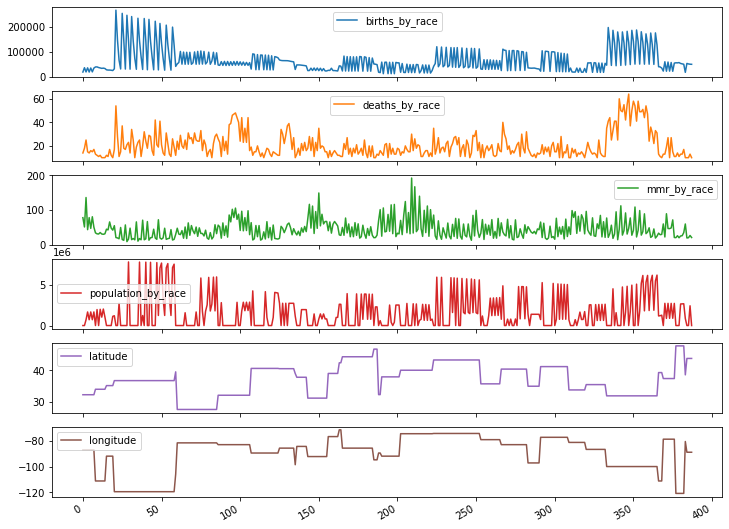

In [4]:
df_plots = df.iloc[:,5:].plot(subplots=True, figsize=(12,10))

/Users/leeprout/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


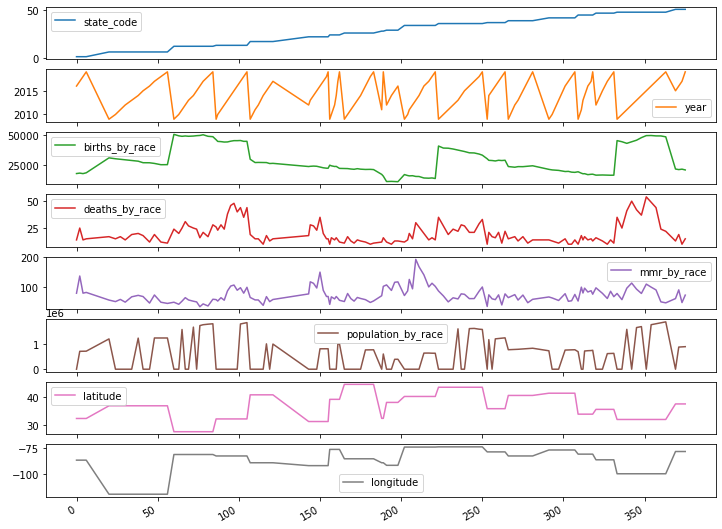

In [5]:
# viewing data for African American and Not Hispanic or Latino
df.plots = df.loc[(df["race"] == "Black or African American") & (df["hispanic_origin"] == "Not Hispanic or Latino")].plot(subplots=True, figsize=(12,10))

In [53]:
# create dataframes for mmr data for each race in our dataset

# african american, not hispanic or latino
af_amer_mmr = df.loc[(df["race"] == "Black or African American") & (df["hispanic_origin"] == "Not Hispanic or Latino")]
af_amer_mmr

# white, not hispanic or latino
wh_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Not Hispanic or Latino")]
wh_mmr

# white, hispanic or latino
wh_hisp_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Hispanic or Latino")]
wh_hisp_mmr

# asian, not hispanic or latino
asian_mmr = df.loc[(df["race"] == "Asian or Pacific Islander") & (df["hispanic_origin"] == "Not Hispanic or Latino")]
asian_mmr

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
23,California,6,2010,Asian or Pacific Islander,Not Hispanic or Latino,65379,11,16.82,2720149,US.CA,CA,36.778261,-119.417932
33,California,6,2013,Asian or Pacific Islander,Not Hispanic or Latino,72708,10,13.75,0,US.CA,CA,36.778261,-119.417932
37,California,6,2014,Asian or Pacific Islander,Not Hispanic or Latino,79561,11,13.83,0,US.CA,CA,36.778261,-119.417932
44,California,6,2016,Asian or Pacific Islander,Not Hispanic or Latino,78187,16,20.46,0,US.CA,CA,36.778261,-119.417932
51,California,6,2018,Asian or Pacific Islander,Not Hispanic or Latino,72747,14,19.24,3278357,US.CA,CA,36.778261,-119.417932
55,California,6,2019,Asian or Pacific Islander,Not Hispanic or Latino,71741,13,18.12,3304759,US.CA,CA,36.778261,-119.417932


In [54]:
# making the heatmap before encoding leaves out race and ethnicity since they are text fields
# fig, ax = plt.subplots(figsize=(10, 8))

# #n = df

# corr = df.corr()

# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, annot=True, ax=ax)

In [6]:
# binary encoding with preserving all columns for heatmap
df_binary_encoded = pd.get_dummies(df, columns=["race", "hispanic_origin"])
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1


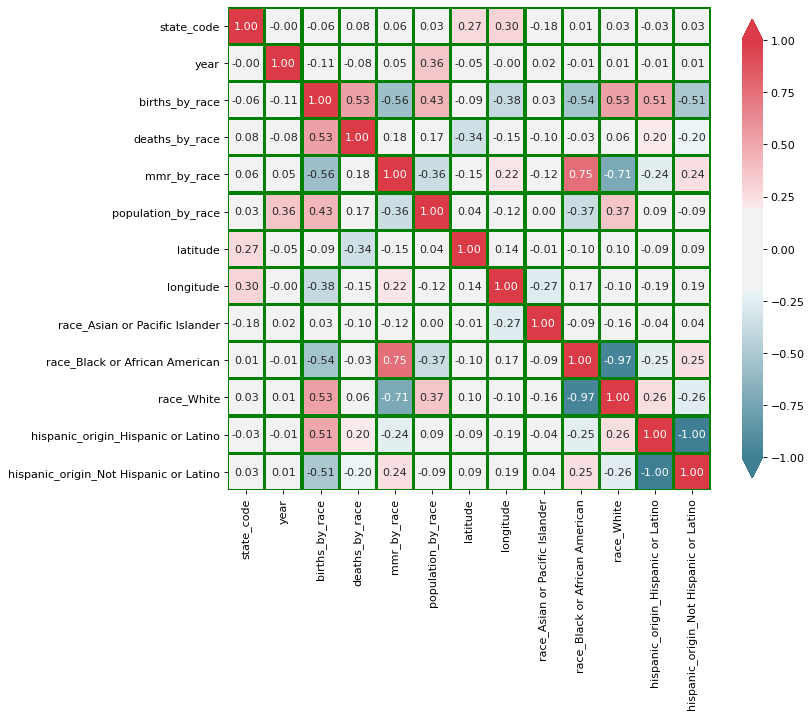

In [7]:
# entire df with binary_encoded data for heatmap
fig, ax = plt.subplots(figsize=(10, 8), dpi=80, facecolor="w", edgecolor="k")

corr = df_binary_encoded.corr()

#setting features
top_corr_features = corr.index
#sns.set_theme(context="paper", style="ticks", font_scale=1.2)

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
           square=True, annot=True, ax=ax, fmt=".2f", linewidths=2, linecolor="green", cbar_kws={"shrink": .95, "extend": "both"})

In [13]:
# setting our X and y values for mmr for all races 
X = df[["race", "hispanic_origin", "births_by_race","deaths_by_race"]]
y = df["mmr_by_race"].values.reshape(-1, 1)
print(X.shape, y.shape)

(388, 4) (388, 1)


In [14]:
# using pd.get_dummies for binary encoding on textual data in race and hispanic_origin columns
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["race", "hispanic_origin"])
data_binary_encoded.head()

,births_by_race,deaths_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,17989,14,0,1,0,0,1
1,35319,18,0,0,1,0,1
2,18354,25,0,1,0,0,1
3,34784,15,0,0,1,0,1
4,17939,14,0,1,0,0,1


In [17]:
# use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,births_by_race,deaths_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
145,33583,16,0,0,1,0,1
7,33892,17,0,0,1,0,1
19,23968,10,0,0,1,0,1
262,28857,11,0,1,0,0,1
367,38473,11,0,0,1,0,1


In [24]:
# running model without scaling data
from sklearn.linear_model import LinearRegression
model_no_scale = LinearRegression()
model_no_scale.fit(X_train, y_train)

LinearRegression()

In [28]:
# find the r2
r_sq_no_scale = model_no_scale.score(X_train, y_train)
r_sq_no_scale
print ("Coefficient of determination (R2):", r_sq_no_scale)

Coefficient of determination (R2): 0.7590236527387246


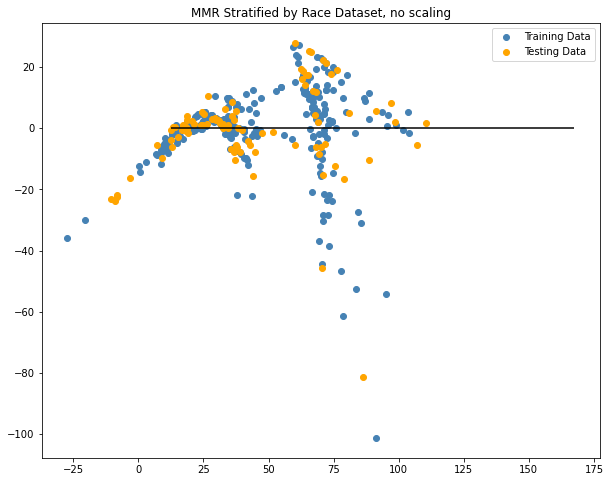

In [30]:
# plot data without scaling 
plt.figure(figsize=(10,8))
plt.scatter(model_no_scale.predict(X_train), model_no_scale.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model_no_scale.predict(X_test), model_no_scale.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("MMR Stratified by Race Dataset, no scaling")
plt.show()

In [31]:
# choosing standard scaler because we know our data has outliers
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [32]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [34]:
# running our model on scaled data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [35]:
# find the r2 for scaled training data
r_sq = model.score(X_train_scaled, y_train_scaled)
r_sq
print ("Coefficient of determination (R2):", r_sq)

Coefficient of determination (R2): 0.7590236527387246


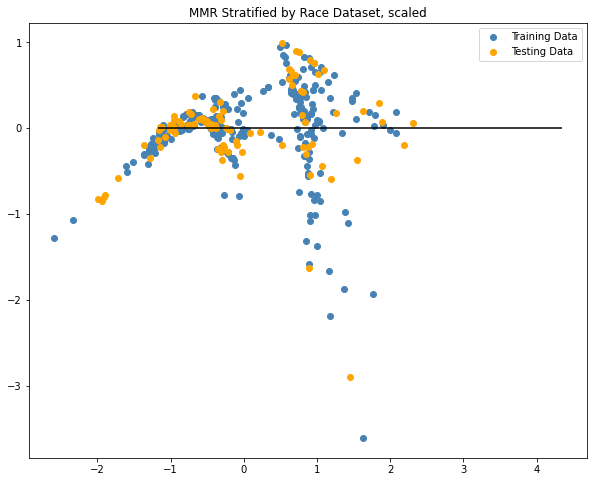

In [36]:
# Plot the results 
plt.figure(figsize=(10,8))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("MMR Stratified by Race Dataset, scaled")
plt.show()

In [37]:
# plot data without scaling 
# model_no_scale = LinearRegression()
# model_no_scale.fit(X_train, y_train)
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()

In [38]:
# make predictions and display r2 for scaled testing data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2514177096597281, R2: 0.7573413261718037


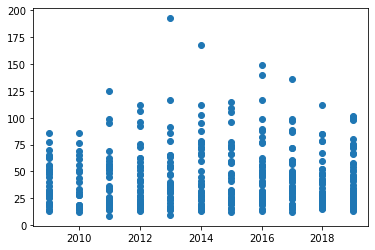

In [35]:
# visualize mmr_by_race across years data was collected
X1 = df["year"].values.reshape(-1,1)
y1 = df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X1, y1)

In [36]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [37]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [38]:
#make predictions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 820.2420577481126, R2: -0.0019601341876613887


In [40]:
# Make predictions for next 11 years
future_mmr =[]
for i in range(2020, 2031):
    r= model1.predict([[i]])
    future_mmr.append(float(r))
      
    
future_mmr

[46.56959433593698,
 46.77622315946206,
 46.98285198298714,
 47.18948080651222,
 47.3961096300373,
 47.60273845356238,
 47.809367277087404,
 48.01599610061248,
 48.22262492413756,
 48.42925374766264,
 48.63588257118772]

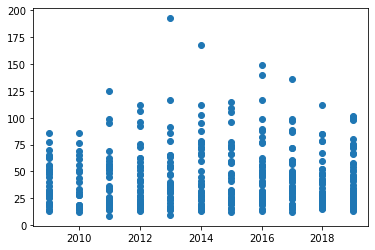

In [22]:
# make predictions for mmr by race and hispanic origin
# X2 = df["year"].values.reshape(-1,1)
# y2 = df["mmr_by_race"].values.reshape(-1,1)
# plt.scatter(X2,y2)

In [41]:
# create a dictionary to hold predicted values
predicted_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_mmr
}

# create a dataframe
predicted_mmr_df = pd.DataFrame(predicted_mmr)
predicted_mmr_df

,year,mmr_by_race
0,2020,46.569594
1,2021,46.776223
2,2022,46.982852
3,2023,47.189481
4,2024,47.396110
5,2025,47.602738
6,2026,47.809367
7,2027,48.015996
8,2028,48.222625
9,2029,48.429254


Text(0, 0.5, 'Maternal Mortality Ratio')

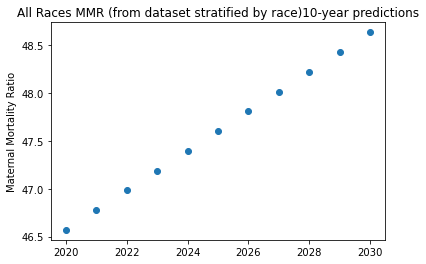

In [144]:
X3 = predicted_mmr_df["year"].values.reshape(-1,1)
y3 = predicted_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X3,y3)
plt.title("All Races MMR (from dataset stratified by race)10-year predictions")
plt.ylabel("Maternal Mortality Ratio")

In [44]:
# combine the prediction dataframe with the original dataframe
dataframes = [df, predicted_mmr_df]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1.0,2016,Black or African American,Not Hispanic or Latino,17989.0,14.0,77.830000,0.0,US.AL,AL,32.318231,-86.902298
1,Alabama,1.0,2016,White,Not Hispanic or Latino,35319.0,18.0,50.960000,0.0,US.AL,AL,32.318231,-86.902298
2,Alabama,1.0,2017,Black or African American,Not Hispanic or Latino,18354.0,25.0,136.210000,704201.0,US.AL,AL,32.318231,-86.902298
3,Alabama,1.0,2017,White,Not Hispanic or Latino,34784.0,15.0,43.120000,1655605.0,US.AL,AL,32.318231,-86.902298
4,Alabama,1.0,2018,Black or African American,Not Hispanic or Latino,17939.0,14.0,78.040000,706754.0,US.AL,AL,32.318231,-86.902298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,NaN,NaN,2026,NaN,NaN,NaN,NaN,47.809367,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,2027,NaN,NaN,NaN,NaN,48.015996,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,2028,NaN,NaN,NaN,NaN,48.222625,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,2029,NaN,NaN,NaN,NaN,48.429254,NaN,NaN,NaN,NaN,NaN


#### African American MMR 

In [64]:
af_amer_mmr.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
6,Alabama,1,2019,Black or African American,Not Hispanic or Latino,18620,15,80.56,709544,US.AL,AL,32.318231,-86.902298
20,California,6,2009,Black or African American,Not Hispanic or Latino,31090,17,54.68,1192173,US.CA,CA,36.778261,-119.417932


In [121]:
# set our x and y
X4 = af_amer_mmr[["year"]]
y4 = af_amer_mmr[["mmr_by_race"]]
print(X.shape, y.shape)

(141, 1) (141, 1)


In [131]:
# use test, train, split to create training and testing data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)

(105, 1)
(105, 1)
(36, 1)


In [123]:
# create the linear regression model
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X4_train, y4_train)

LinearRegression()

In [124]:
from sklearn.metrics import mean_squared_error

predictions = model2.predict(X4_test)
MSE = mean_squared_error(y4_test, predictions)
r2 = model2.score(X4_test, y4_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 487.18502790582744, R2: -0.17542467279890794


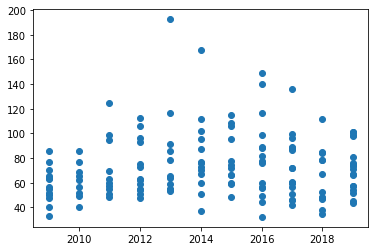

In [133]:

# visualize african american mmr
X4 = af_amer_mmr["year"].values.reshape(-1,1)
y4 = af_amer_mmr["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X4,y4)

In [135]:
# Make predictions for next 11 years
future_af_amer_mmr =[]
for i in range(2020, 2031):
    r= model2.predict([[i]])
    future_af_amer_mmr.append(float(r))
      
    
future_af_amer_mmr

[76.34695944373334,
 76.54468870010476,
 76.74241795647623,
 76.9401472128477,
 77.13787646921918,
 77.33560572559065,
 77.53333498196213,
 77.73106423833354,
 77.92879349470502,
 78.1265227510765,
 78.32425200744797]

In [136]:
# create a dictionary to hold predicted values
predicted_af_amer_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_af_amer_mmr
}

# create a dataframe
predicted_af_amer_mmr_df = pd.DataFrame(predicted_af_amer_mmr)
predicted_af_amer_mmr_df

,year,mmr_by_race
0,2020,76.346959
1,2021,76.544689
2,2022,76.742418
3,2023,76.940147
4,2024,77.137876
5,2025,77.335606
6,2026,77.533335
7,2027,77.731064
8,2028,77.928793
9,2029,78.126523


Text(0, 0.5, 'Maternal Mortality Ratio')

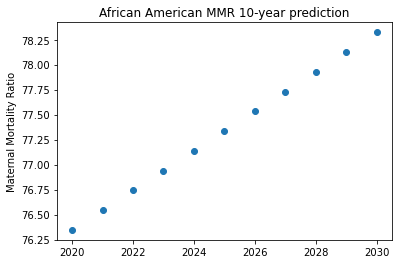

In [139]:
X6 = predicted_af_amer_mmr_df["year"].values.reshape(-1,1)
y6 = predicted_af_amer_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X6,y6)
plt.title("African American MMR 10-year prediction")
plt.ylabel("Maternal Mortality Ratio")